# Foreign exchange rates
#### Using Bank of Canada's Valet API

In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get exchange rate data using valet api
url = "https://www.bankofcanada.ca/valet/observations/group/FX_RATES_DAILY/json"
response = requests.get(url)
data = response.json()

In [20]:
# set currencies (e.g., 'CAD', 'EUR', 'MXN', 'USD')
foreign_currency = 'MXN'  # set foreign currency 
target_currency = 'CAD'  # keep target currency as CAD

# extract exchange rates
rates = data['observations']

# construct key for desired currency pair
exchange_rate_key = f"FX{foreign_currency}{target_currency}"

# extract rates for currency pair
exchange_rates = [
    {
     "date": obs["d"], 
     "rate": float(obs[exchange_rate_key]["v"])
    }
    for obs in rates if exchange_rate_key in obs
                 ]
df = pd.DataFrame(exchange_rates)
df.rename(columns={'rate': f'{foreign_currency} to CAD'}, inplace=True)

# add column for CAD to foreign currency
df["CAD to " + foreign_currency] = 1 / df[f'{foreign_currency} to CAD']

# display results
print('Foreign exchange rate:', foreign_currency, 'to CAN, previous 10 days', '\n\n')
df.tail(10)


Foreign exchange rate: MXN to CAN, previous 10 days 




,date,MXN to CAD,CAD to MXN
1992,2024-12-27,0.07105,14.074595
1993,2024-12-30,0.07007,14.271443
1994,2024-12-31,0.06929,14.432097
1995,2025-01-02,0.06976,14.334862
1996,2025-01-03,0.06995,14.295926
1997,2025-01-06,0.07056,14.172336
1998,2025-01-07,0.07055,14.174344
1999,2025-01-08,0.07051,14.182385
2000,2025-01-09,0.07028,14.228799
2001,2025-01-10,0.06972,14.343087


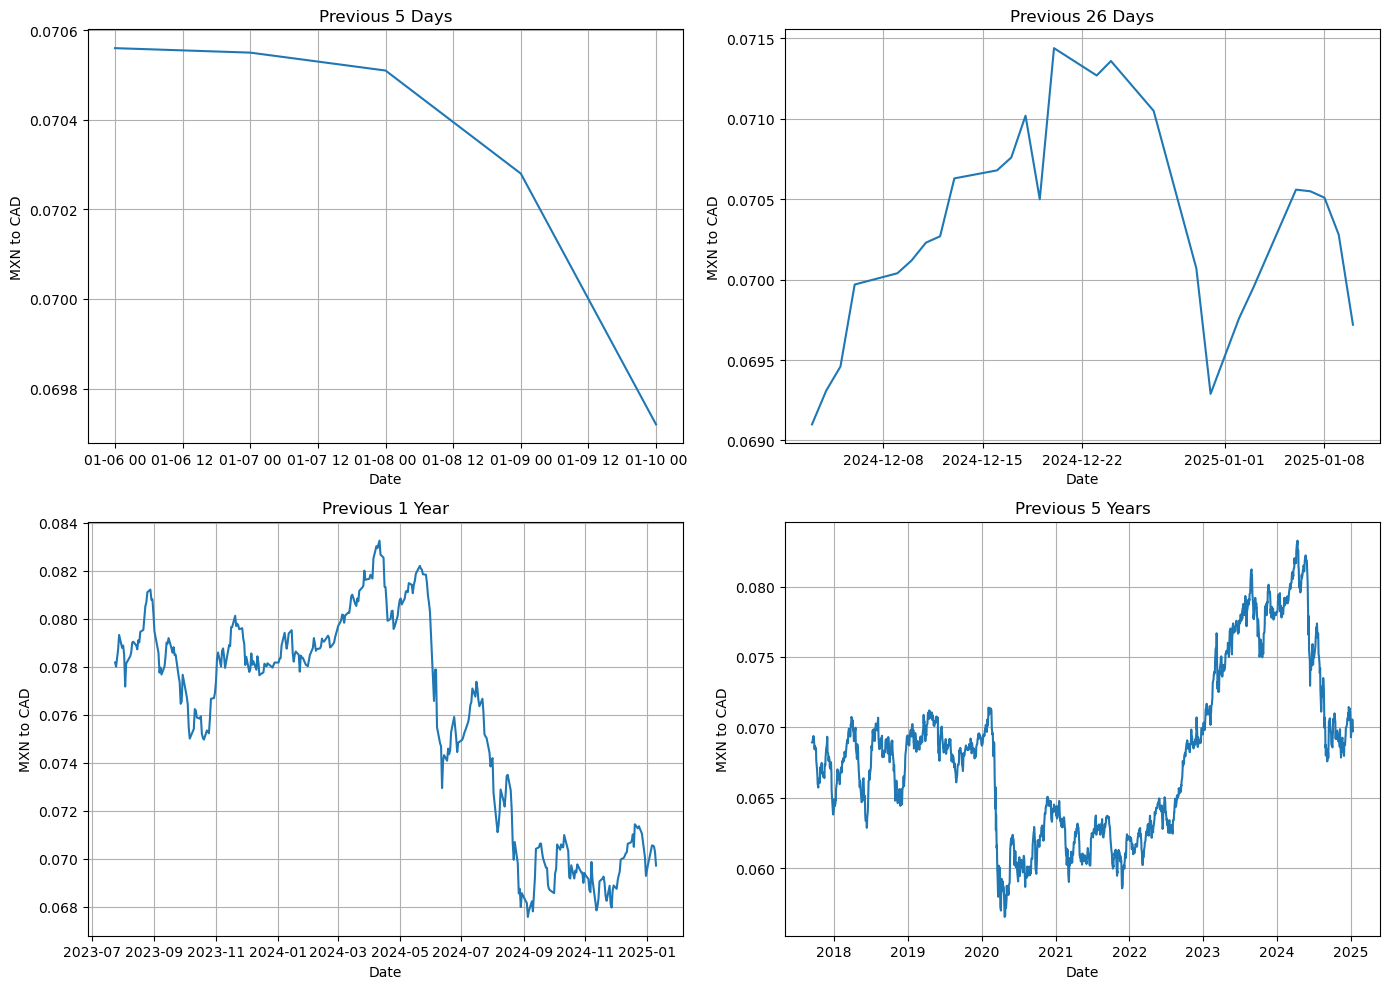

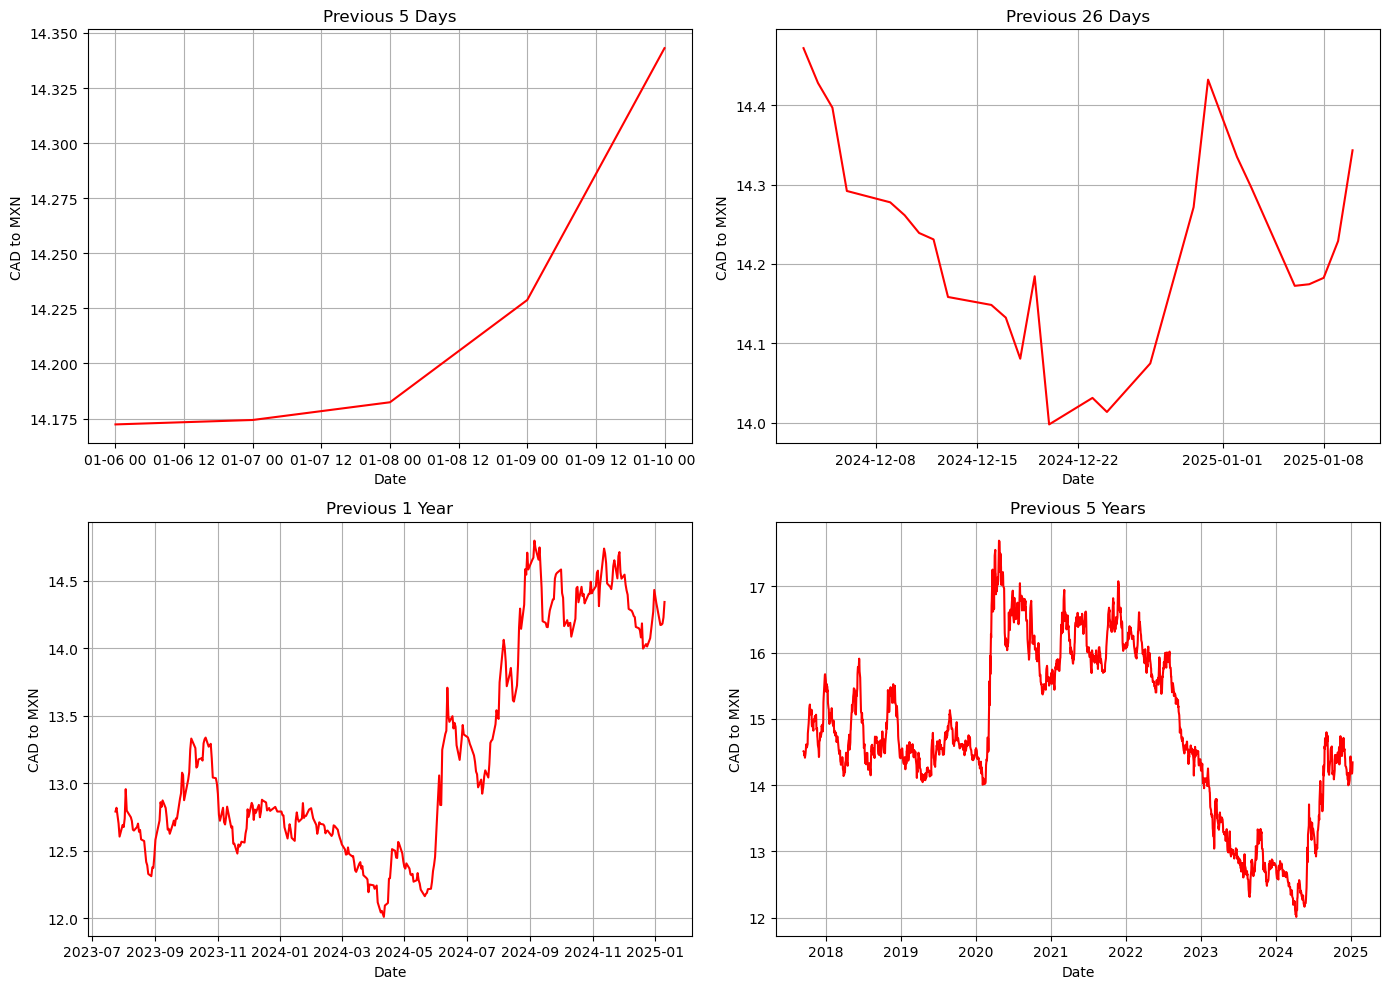

<Figure size 640x480 with 0 Axes>

In [23]:
# visualization

# convert date to datetime series
df['date'] = pd.to_datetime(df['date'])

# sort
df = df.sort_values(by = 'date')

# 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Function to plot the exchange rates for a given period
def plot_exchange_rate(ax, data, title, label):
    ax.plot(data['date'], data[label])
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel(f'{label}')
    ax.grid(True)

# Plot for previous 5 days
five_days = df.tail(5)  # last 5 days
plot_exchange_rate(axes[0, 0], five_days, 'Previous 5 Days', f'{foreign_currency} to CAD')

# Plot for previous 26 days
twenty_six_days = df.tail(26)  # last 26 days
plot_exchange_rate(axes[0, 1], twenty_six_days, 'Previous 26 Days', f'{foreign_currency} to CAD')

# Plot for previous 1 year (365 days)
one_year = df.tail(365)  # last 1 year (approx)
plot_exchange_rate(axes[1, 0], one_year, 'Previous 1 Year', f'{foreign_currency} to CAD')

# Plot for previous 5 years (assuming 5 years = 5 * 365 days)
five_years = df.tail(5 * 365)  # last 5 years (approx)
plot_exchange_rate(axes[1, 1], five_years, 'Previous 5 Years', f'{foreign_currency} to CAD')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create a second 2x2 plot grid for CAD to foreign_currency in red
fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))

# Function to plot the exchange rates for CAD to foreign_currency (in red)
def plot_reverse_exchange_rate(ax, data, title, label, color='red'):
    ax.plot(data['date'], 1 / data[label], color=color)  # Inverse of foreign_currency to CAD
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel(f'CAD to {foreign_currency}')
    ax.grid(True)

# Plot for previous 5 days - CAD to foreign_currency
plot_reverse_exchange_rate(axes2[0, 0], five_days, 'Previous 5 Days', f'{foreign_currency} to CAD')

# Plot for previous 26 days - CAD to foreign_currency
plot_reverse_exchange_rate(axes2[0, 1], twenty_six_days, 'Previous 26 Days', f'{foreign_currency} to CAD')

# Plot for previous 1 year (365 days) - CAD to foreign_currency
plot_reverse_exchange_rate(axes2[1, 0], one_year, 'Previous 1 Year', f'{foreign_currency} to CAD')

# Plot for previous 5 years (assuming 5 years = 5 * 365 days) - CAD to foreign_currency
plot_reverse_exchange_rate(axes2[1, 1], five_years, 'Previous 5 Years', f'{foreign_currency} to CAD')

# Adjust layout for the first figure (foreign_currency to CAD)
plt.tight_layout()
plt.show()

# Adjust layout for the second figure (CAD to foreign_currency)
plt.tight_layout()
plt.show()
